# Cigarette Detection Workflow:

1. EDA
  1. Upload Data from Drive
  2. Import data and turn into batches
  3. Split valid_data (new_valid_data and test) and turn them into batches
  4. Data Inspection Function (Number of batches, images, labels, shapes)
  5. Easier Visualization of Data (using a function rather than directories)

2. Deep Learning Baseline Model
  6. Basic CNN Model
  7. Create function plot_loss_curves

3. Experimenting with Transfer Learning

4. Experimenting with Data Augmentation
  8. Data Augmentation
  9. Add Augmented images into training directory (train_dir)

5. Deep Learning Experiments with CNNs

6. Evaluation
  10. Predict a specific image using a function:pred_and_plot
  11. Evaluation Metrics (ex: Accuracy, Precision, Confusion Matrices, etc.)

7. Experimenting with Transfer Learning
  12. Try a number of Transfer Learning Models well-adapted to the task

8. Complete Comparison between Models

9. Focus on the best model and try enhancing it

10. Results & Conclusions


## Get the Data

Upload the files from google drive (https://drive.google.com/file/d/170B1gLX73PlZoLDBFzxuH0ugfUIg9lmn/view?usp=sharing):
- Train (Labeled Images)
- Validation (Labeled Images)
- Test (Unlabeled Images)

In [1]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# Unzip the downloaded file
import zipfile
zip_ref = zipfile.ZipFile("/content/drive/MyDrive/Dataset_New.zip", "r")
zip_ref.extractall()
zip_ref.close()

## Data Inspection

- List the folders inside the directories
- Get the number of images in every directory


#### List the folders

In [3]:
# List the Folders inside directories
!ls Dataset_New/
!ls Dataset_New/training_data/
!ls Dataset_New/validation_data/
!ls Dataset_New/testing_data/


testing_data  training_data  validation_data
notsmoking  smoking
notsmoking  smoking
test_pictures


In [4]:
!ls Dataset_New/testing_data/test_pictures

abc001.jpg  abc051.jpg	abc101.jpg  abc151.jpg	abc201.jpg  abc251.jpg	 abc301.jpg  abc351.jpg
abc002.jpg  abc052.jpg	abc102.jpg  abc152.jpg	abc202.jpg  abc252.jpg	 abc302.jpg  abc352.jpg
abc003.jpg  abc053.jpg	abc103.jpg  abc153.jpg	abc203.jpg  abc253.jpg	 abc303.jpg  abc353.jpg
abc004.jpg  abc054.jpg	abc104.jpg  abc154.jpg	abc204.jpg  abc254.jpg	 abc304.jpg  abc354.jpg
abc005.jpg  abc055.jpg	abc105.jpg  abc155.jpg	abc205.jpg  abc255.jpg	 abc305.jpg  abc355.jpg
abc006.jpg  abc056.jpg	abc106.jpg  abc156.jpg	abc206.jpg  abc256.jpg	 abc306.jpg  abc356.jpg
abc007.jpg  abc057.jpg	abc107.jpg  abc157.jpg	abc207.jpg  abc257.jpg	 abc307.jpg  abc357.jpg
abc008.jpg  abc058.jpg	abc108.jpg  abc158.jpg	abc208.jpg  abc258.jpg	 abc308.jpg  abc358.jpg
abc009.jpg  abc059.jpg	abc109.jpg  abc159.jpg	abc209.jpg  abc259.jpg	 abc309.jpg  abc359.jpg
abc010.jpg  abc060.jpg	abc110.jpg  abc160.jpg	abc210.jpg  abc260.jpg	 abc310.jpg  abc360.jpg
abc011.jpg  abc061.jpg	abc111.jpg  abc161.jpg	abc211.jpg  abc261.jpg	 

#### Number of Images and Directories


In [5]:
import os

# WALK through main directory and list number of files
for dirpath, dirnames, filenames in os.walk("Dataset_New"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")


# To find out how many images are in a specific file
num_smoking_images_train = len(os.listdir("Dataset_New/training_data/smoking"))
num_nonsmoking_images_train = len(os.listdir("Dataset_New/training_data/smoking"))
print(f"There are {num_smoking_images_train} images of smokers in the training Dataset_New.")
print(f"There are {num_nonsmoking_images_train} images of non-smokers in the training Dataset_New.")

There are 3 directories and 0 images in 'Dataset_New'.
There are 2 directories and 0 images in 'Dataset_New/validation_data'.
There are 0 directories and 200 images in 'Dataset_New/validation_data/notsmoking'.
There are 0 directories and 200 images in 'Dataset_New/validation_data/smoking'.
There are 1 directories and 0 images in 'Dataset_New/testing_data'.
There are 0 directories and 400 images in 'Dataset_New/testing_data/test_pictures'.
There are 2 directories and 0 images in 'Dataset_New/training_data'.
There are 0 directories and 805 images in 'Dataset_New/training_data/notsmoking'.
There are 0 directories and 805 images in 'Dataset_New/training_data/smoking'.
There are 805 images of smokers in the training Dataset_New.
There are 805 images of non-smokers in the training Dataset_New.


## Visualize Our Images Randomly
- Create a list of classnames (Smoking, notsmoking)
- Visualize a random image (specify if smoking or notsmoking) from a target directory

### Get Classnames

In [6]:
import pathlib
import numpy as np

# turn our training path into a Python path
data_dir = pathlib.Path("Dataset_New/training_data/")

# created a list of class_names from the subdirectories
class_names = np.array(sorted([item.name for item in data_dir.glob('*')]))

print(class_names)

['notsmoking' 'smoking']


### View a Random Image from a Directory Path

In [7]:
# View an image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):

  # Setup target directory (we'll view images from here)
  target_folder = target_dir+target_class

  # Get a random image path
  random_image = random.sample(os.listdir(target_folder), 1)

  # Read in the image and plot it using matplotlib
  img = mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off");

  # show the shape of the image
  print(f"Image shape (width, height, color): {img.shape}") # returns width, height,color channels

  # img is an array/tensor
  return img

Image shape (width, height, color): (1024, 683, 3)


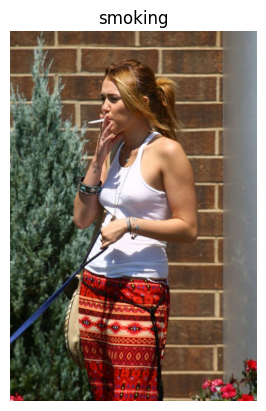

In [8]:
# View a random image (smoking) from the training Dataset_New
img = view_random_image(target_dir="Dataset_New/training_data/",
                        target_class="smoking")

Image shape (width, height, color): (1218, 804, 3)


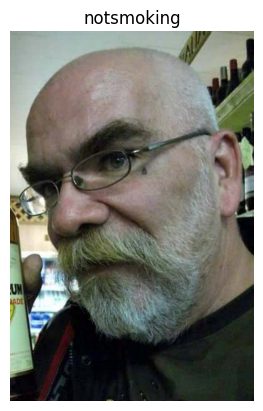

In [9]:
# View a random image (non-smoking) from the training Dataset_New
img = view_random_image(target_dir="Dataset_New/training_data/",
                        target_class="notsmoking")

## Preprocessing the Data

- Work only on training_data and validation_data
- Preprocess using ImageDataGenerator
- Turn data into batches using flow_from_directory (target_size = 224x224)

In [10]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split

In [11]:
# Set the seed
tf.random.set_seed(42)

# Preprocess data (get all of the pixel values between 1 and 0, also called scaling/normalization)
train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)

# Setup the train and validation directories
train_dir = "Dataset_New/training_data/"
valid_dir = "Dataset_New/validation_data/"


# Import data from directories and turn it into batches
train_data = train_datagen.flow_from_directory(train_dir,
                                               batch_size=32, # number of images to process at a time
                                               target_size=(224, 224), # convert all images to be 224 x 224
                                               class_mode="binary", # type of problem we're working on
                                               seed=42,
                                               shuffle=False)

valid_data = valid_datagen.flow_from_directory(valid_dir,
                                               batch_size=32,
                                               target_size=(224, 224),
                                               class_mode="binary",
                                               seed=42,
                                               shuffle = False)


Found 1610 images belonging to 2 classes.
Found 400 images belonging to 2 classes.


## Split valid_data into two datasets:

- To evaluate our models, test images must be labeled. Therefore, the validation_data (400 labeled image) is split into two datasets. (40% validation and 60% test)
- Place New Folders as Directories and perform previous preprocessing steps
- Map numeric labels to class names

In [12]:
import numpy as np
from sklearn.model_selection import train_test_split
import os
import shutil

# Get all image file paths and labels from the validation data
val_file_paths = valid_data.filepaths
val_labels = valid_data.labels

# Map numeric labels to class names
label_map = {0: 'notsmoking', 1: 'smoking'}

# Split the data into validation and test sets (40% validation, 60% test)
new_val_file_paths, test_file_paths, new_val_labels, test_labels = train_test_split(
    val_file_paths, val_labels, test_size=0.6, random_state=42, stratify=val_labels)

# Helper function to create directory structure and copy files
def create_split_directory(file_paths, labels, base_dir, label_map):
    for label in label_map.values():
        os.makedirs(os.path.join(base_dir, label), exist_ok=True)
    for file_path, label in zip(file_paths, labels):
        dest_dir = os.path.join(base_dir, label_map[label])
        shutil.copy(file_path, dest_dir)


### Create directories for the new validation and test sets, preprocess them and turn them into batches

In [13]:
# Create directories for the new validation and test sets
new_val_dir = 'Dataset_New/new_validation'
test_dir = 'Dataset_New/test'

# Make sure the directories are clean
if os.path.exists(new_val_dir):
    shutil.rmtree(new_val_dir)
if os.path.exists(test_dir):
    shutil.rmtree(test_dir)

# Create the directory structures and copy the files
create_split_directory(new_val_file_paths, new_val_labels, new_val_dir, label_map)
create_split_directory(test_file_paths, test_labels, test_dir, label_map)

# Create ImageDataGenerators for the new validation and test sets
new_val_datagen = ImageDataGenerator(rescale=1./255)
new_test_datagen = ImageDataGenerator(rescale=1./255)

# Create the new validation set generator
new_valid_data = new_val_datagen.flow_from_directory(new_val_dir,
                                                          target_size=(224, 224),
                                                          class_mode="binary",
                                                          batch_size=32,
                                                          shuffle=False)

# Create the test set generator
new_test_data = new_test_datagen.flow_from_directory(test_dir,
                                             target_size=(224, 224),
                                             class_mode="binary",
                                             batch_size=32,
                                             shuffle=False)

# Print the class indices to verify
print("Training set class indices:", train_data.class_indices)
print("New validation set class indices:", new_valid_data.class_indices)
print("Test set class indices:", new_test_data.class_indices)


Found 160 images belonging to 2 classes.
Found 240 images belonging to 2 classes.
Training set class indices: {'notsmoking': 0, 'smoking': 1}
New validation set class indices: {'notsmoking': 0, 'smoking': 1}
Test set class indices: {'notsmoking': 0, 'smoking': 1}


## Data Inspection Function

Build a function to find:
- Find the number of batches
- Find the number of images
- Find the number of labels
- Find the shape of images

In [14]:
def data_inspection(filename):
  images, labels = next(filename)
  print(f"Shape of images in {filename}: {images.shape}")
  print(f"Shape of labels in {filename}: {labels.shape}")
  print(f"The number of batches: {len(filename)}")
  print(f"The number of images: {len(images)}")
  print(f"the number of labels: {len(labels)}")

In [15]:
data_inspection(new_valid_data)

Shape of images in <keras.src.preprocessing.image.DirectoryIterator object at 0x7d168ae6dab0>: (32, 224, 224, 3)
Shape of labels in <keras.src.preprocessing.image.DirectoryIterator object at 0x7d168ae6dab0>: (32,)
The number of batches: 5
The number of images: 32
the number of labels: 32


In [16]:
data_inspection(new_test_data)

Shape of images in <keras.src.preprocessing.image.DirectoryIterator object at 0x7d168ae6f2b0>: (32, 224, 224, 3)
Shape of labels in <keras.src.preprocessing.image.DirectoryIterator object at 0x7d168ae6f2b0>: (32,)
The number of batches: 8
The number of images: 32
the number of labels: 32


In [17]:
data_inspection(train_data)

Shape of images in <keras.src.preprocessing.image.DirectoryIterator object at 0x7d168ae6e530>: (32, 224, 224, 3)
Shape of labels in <keras.src.preprocessing.image.DirectoryIterator object at 0x7d168ae6e530>: (32,)
The number of batches: 51
The number of images: 32
the number of labels: 32


## Visualize our Images Specifically

Build a function to fetch generators rather than directories

In [18]:
# Function to view specific images
def view_images(generator, index, label_map):
    # Calculate the batch number and index within the batch
    batch_number = index // generator.batch_size
    index_within_batch = index % generator.batch_size

    # Fetch the specific batch
    images, labels = generator[batch_number]

    # Display the specific image within the batch
    plt.imshow(images[index_within_batch])
    plt.title(label_map[int(labels[index_within_batch])])
    plt.axis(False)
    plt.show()


## If data is shuffled, function will randomize images

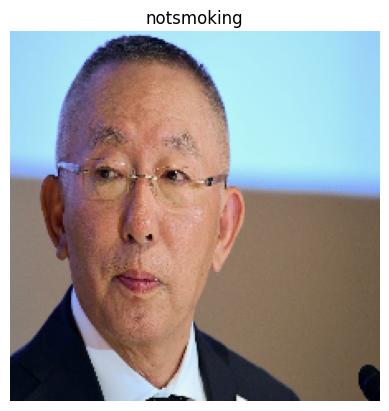

In [19]:
view_images(new_test_data, 1, label_map)

## CNN Model

Build a a simple CNN Model for our Project.

In [ ]:
# Create a CNN model
model_1 = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(filters=10,
                         kernel_size=3, # can also be (3, 3)
                         activation="relu",
                         input_shape=(224, 224, 3)), # first layer specifies input shape (height, width, color channels)
  tf.keras.layers.Conv2D(10, 3, activation="relu"),
  tf.keras.layers.MaxPool2D(pool_size=2, # pool_size can also be (2, 2)
                            padding="valid"), # padding can also be 'same'
  tf.keras.layers.Conv2D(10, 3, activation="relu"),
  tf.keras.layers.Conv2D(10, 3, activation="relu"),
  tf.keras.layers.MaxPool2D(2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(1, activation="sigmoid") # binary activation output
])

# Compile the model
model_1.compile(loss="binary_crossentropy",
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

# Fit the model
history_1 = model_1.fit(train_data,
                        epochs=10,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(new_valid_data))

Epoch 1/10
51/51 [==============================] - 30s 443ms/step - loss: 0.7052 - accuracy: 0.6311 - val_loss: 0.3189 - val_accuracy: 0.9438
Epoch 2/10
51/51 [==============================] - 24s 470ms/step - loss: 0.6320 - accuracy: 0.6671 - val_loss: 1.0209 - val_accuracy: 0.3187
Epoch 3/10
51/51 [==============================] - 25s 490ms/step - loss: 0.7151 - accuracy: 0.5193 - val_loss: 0.6792 - val_accuracy: 0.7125
Epoch 4/10
51/51 [==============================] - 23s 436ms/step - loss: 0.6585 - accuracy: 0.6050 - val_loss: 0.8858 - val_accuracy: 0.0000e+00
Epoch 5/10
51/51 [==============================] - 25s 489ms/step - loss: 0.6663 - accuracy: 0.5752 - val_loss: 0.9319 - val_accuracy: 0.1813
Epoch 6/10
51/51 [==============================] - 22s 428ms/step - loss: 0.6284 - accuracy: 0.6590 - val_loss: 0.6545 - val_accuracy: 0.7375
Epoch 7/10
51/51 [==============================] - 24s 468ms/step - loss: 0.6142 - accuracy: 0.6783 - val_loss: 0.5340 - val_accuracy: 0.

In [ ]:
# Summary
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 10)      280       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d (MaxPooling2  (None, 110, 110, 10)      0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 10)      910       
                                                                 
 conv2d_3 (Conv2D)           (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 53, 53, 10)        0         
 g2D)                                                   

## Function for Plotting Validation and Training Curves

In [38]:
# Plot validation and training curve separately
def plot_loss_curves(history):
  """
  Returns separate loss curves for training and validation metrics.
  """
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']

  epochs = range(len(history.history['loss']))

  # Plot loss
  plt.plot(epochs, loss, label='training_loss')
  plt.plot(epochs, val_loss, label='val_loss')
  plt.title('Loss')
  plt.xlabel('Epochs')
  plt.legend()

  # Plot accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label='training_accuracy')
  plt.plot(epochs, val_accuracy, label='val_accuracy')
  plt.title('Accuracy')
  plt.xlabel('Epochs')
  plt.legend();

In [ ]:
plot_loss_curves(history_1)

## Transfer Learning -NO DATA AUGMENTATION

- Try 3 different models
1. ResNet50-V2
2. EfficientNetB0-V2
3. MobileNetV2

In [35]:
# Add timestamp
import datetime
print(f"Notebook last run (end-to-end): {datetime.datetime.now()}")

Notebook last run (end-to-end): 2024-07-29 19:06:44.394963


### Setting Up Callbacks

In [34]:
# Create tensorboard callback (functionized because need to create a new one for each model)
import datetime
def create_tensorboard_callback(dir_name, experiment_name):
  log_dir = dir_name + "/" + experiment_name + "/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
  tensorboard_callback = tf.keras.callbacks.TensorBoard(
      log_dir=log_dir
  )
  print(f"Saving TensorBoard log files to: {log_dir}")
  return tensorboard_callback

## Create Model using TensorFlow Hub -NO DATA AUGMENTATION

In [20]:
import tensorflow as tf
import tensorflow_hub as hub
from tensorflow.keras import layers
from tensorflow.keras.applications import ResNet50V2, EfficientNetB0, MobileNetV2
from tensorflow.keras.utils import plot_model

In [21]:
# Resnet 50 V2 feature vector
resnet_url = "https://kaggle.com/models/google/resnet-v2/TensorFlow2/50-feature-vector/1"

# EfficientNetB0 feature vector
efficientnet_url = "https://www.kaggle.com/models/google/efficientnet-v2/TensorFlow2/imagenet1k-b0-feature-vector/2"

# MobileNetV2 feature Vector
mobilenet_url = "https://www.kaggle.com/models/google/mobilenet-v2/TensorFlow2/035-224-feature-vector/2"

In [ ]:
len(class_names)

2

In [22]:
def create_model(model_url, num_classes=1):
  """Takes a TensorFlow Hub URL and creates a Keras Sequential model with it.

  Args:
    model_url (str): A TensorFlow Hub feature extraction URL.
    num_classes (int): Number of output neurons in output layer,
      should be equal to number of target classes, default 10.

  Returns:
    An uncompiled Keras Sequential model with model_url as feature
    extractor layer and Dense output layer with num_classes outputs.
  """
  # Download the pretrained model and save it as a Keras layer
  feature_extractor_layer = hub.KerasLayer(model_url,
                                           trainable=False, # freeze the underlying patterns
                                           name='feature_extraction_layer',
                                           input_shape=(224,224,3)) # define the input image shape

  # Create our own model
  model = tf.keras.Sequential([
    feature_extractor_layer, # use the feature extraction layer as the base
    layers.Dense(128, activation='relu', name='dense_layer_1'), # add a dense layer with ReLU activation
    layers.Dense(64, activation='relu', name='dense_layer_2'), # add another dense layer with ReLU activation
    layers.Dense(32, activation='relu', name='dense_layer_3'), # add another dense layer with ReLU activation
    layers.Dense(16, activation='relu', name='dense_layer_4'), # add another dense layer with ReLU activation
    layers.Dense(8, activation='relu', name='dense_layer_5'), # add another dense layer with ReLU activation
    layers.Dense(num_classes, activation='sigmoid', name='output_layer') # create our own output layer
  ])

  return model

### ResNetV2-50 Model

In [ ]:
# Create model
resnet_model = create_model(resnet_url, num_classes=1)

# Compile
resnet_model.compile(loss='binary_crossentropy',
                     optimizer=tf.keras.optimizers.Adam(),
                     metrics=['accuracy'])

In [ ]:
# Fit the model
resnet_history = resnet_model.fit(train_data,
                                  epochs=10,
                                  steps_per_epoch=len(train_data),
                                  validation_data=new_valid_data,
                                  validation_steps=len(new_valid_data),
                                  callbacks=[create_tensorboard_callback(dir_name="tensorflow_hub", # save experiment logs here
                                                                         experiment_name="ResNetV2-50")]) # name of log files

Saving TensorBoard log files to: tensorflow_hub/ResNetV2-50/20240725-122559
Epoch 1/10
51/51 [==============================] - 33s 468ms/step - loss: 0.7422 - accuracy: 0.5571 - val_loss: 0.6115 - val_accuracy: 0.8188
Epoch 2/10
51/51 [==============================] - 22s 440ms/step - loss: 0.5657 - accuracy: 0.7522 - val_loss: 0.4476 - val_accuracy: 0.8625
Epoch 3/10
51/51 [==============================] - 23s 429ms/step - loss: 0.3711 - accuracy: 0.8615 - val_loss: 0.3028 - val_accuracy: 0.9062
Epoch 4/10
51/51 [==============================] - 23s 456ms/step - loss: 0.3541 - accuracy: 0.8559 - val_loss: 0.2967 - val_accuracy: 0.8813
Epoch 5/10
51/51 [==============================] - 22s 417ms/step - loss: 0.3408 - accuracy: 0.8478 - val_loss: 0.2854 - val_accuracy: 0.8813
Epoch 6/10
51/51 [==============================] - 23s 445ms/step - loss: 0.2537 - accuracy: 0.8981 - val_loss: 0.2432 - val_accuracy: 0.9062
Epoch 7/10
51/51 [==============================] - 24s 469ms/step

In [ ]:
# Resnet summary
resnet_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 feature_extraction_layer (  (None, 2048)              23564800  
 KerasLayer)                                                     
                                                                 
 dense_layer_1 (Dense)       (None, 128)               262272    
                                                                 
 dense_layer_2 (Dense)       (None, 64)                8256      
                                                                 
 dense_layer_3 (Dense)       (None, 32)                2080      
                                                                 
 dense_layer_4 (Dense)       (None, 16)                528       
                                                                 
 dense_layer_5 (Dense)       (None, 8)                 136       
                                                      

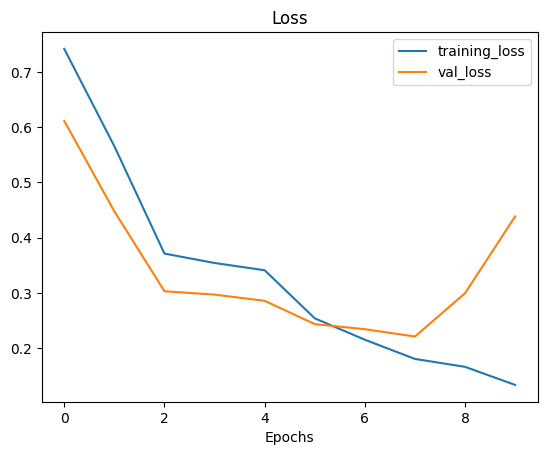

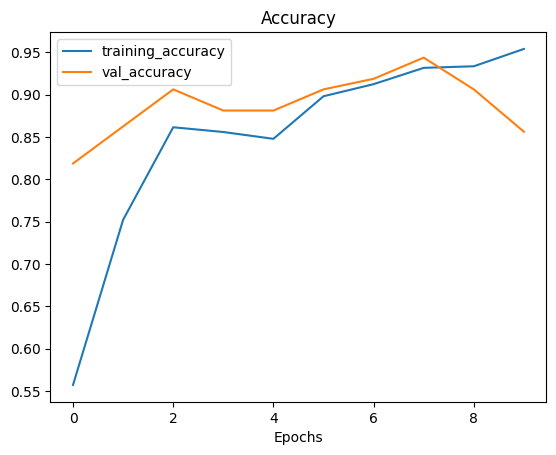

In [ ]:
plot_loss_curves(resnet_history)

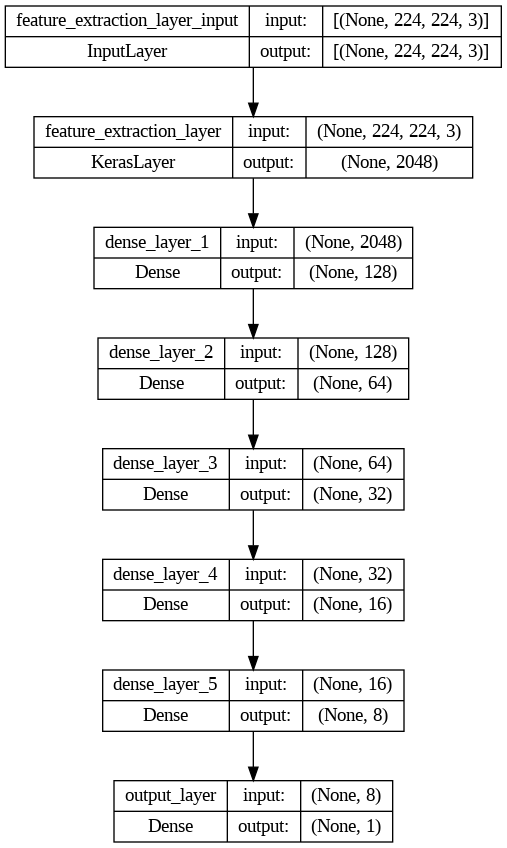

In [ ]:
plot_model(resnet_model, show_shapes=True)

### EfficientNet-V2 Model


In [ ]:
# Create model
efficientnet_model = create_model(efficientnet_url, num_classes=1)

# Compile
efficientnet_model.compile(loss='binary_crossentropy',
                     optimizer=tf.keras.optimizers.Adam(),
                     metrics=['accuracy'])

In [ ]:
# Fit the model
efficientnet_history = efficientnet_model.fit(train_data,
                                  epochs=10,
                                  steps_per_epoch=len(train_data),
                                  validation_data=new_valid_data,
                                  validation_steps=len(new_valid_data),
                                  callbacks=[create_tensorboard_callback(dir_name="tensorflow_hub", # save experiment logs here
                                                                         experiment_name="EfficientNet-V2")]) # name of log files

Saving TensorBoard log files to: tensorflow_hub/EfficientNet-V2/20240725-123309
Epoch 1/10
51/51 [==============================] - 34s 450ms/step - loss: 0.6201 - accuracy: 0.6130 - val_loss: 0.4932 - val_accuracy: 0.8562
Epoch 2/10
51/51 [==============================] - 22s 429ms/step - loss: 0.4497 - accuracy: 0.8447 - val_loss: 0.4984 - val_accuracy: 0.7188
Epoch 3/10
51/51 [==============================] - 21s 421ms/step - loss: 0.3089 - accuracy: 0.8739 - val_loss: 0.3357 - val_accuracy: 0.8500
Epoch 4/10
51/51 [==============================] - 22s 416ms/step - loss: 0.2595 - accuracy: 0.8963 - val_loss: 0.3262 - val_accuracy: 0.8562
Epoch 5/10
51/51 [==============================] - 22s 422ms/step - loss: 0.2097 - accuracy: 0.9186 - val_loss: 0.2532 - val_accuracy: 0.8938
Epoch 6/10
51/51 [==============================] - 30s 586ms/step - loss: 0.1596 - accuracy: 0.9429 - val_loss: 0.2470 - val_accuracy: 0.9187
Epoch 7/10
51/51 [==============================] - 23s 450ms/

In [ ]:
# EfficientNet summary
efficientnet_model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 feature_extraction_layer (  (None, 1280)              5919312   
 KerasLayer)                                                     
                                                                 
 dense_layer_1 (Dense)       (None, 128)               163968    
                                                                 
 dense_layer_2 (Dense)       (None, 64)                8256      
                                                                 
 dense_layer_3 (Dense)       (None, 32)                2080      
                                                                 
 dense_layer_4 (Dense)       (None, 16)                528       
                                                                 
 dense_layer_5 (Dense)       (None, 8)                 136       
                                                      

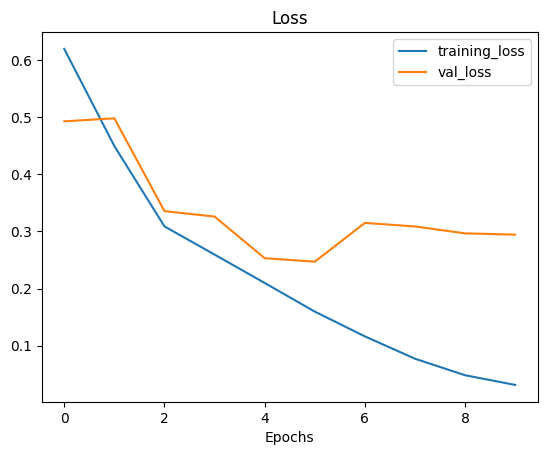

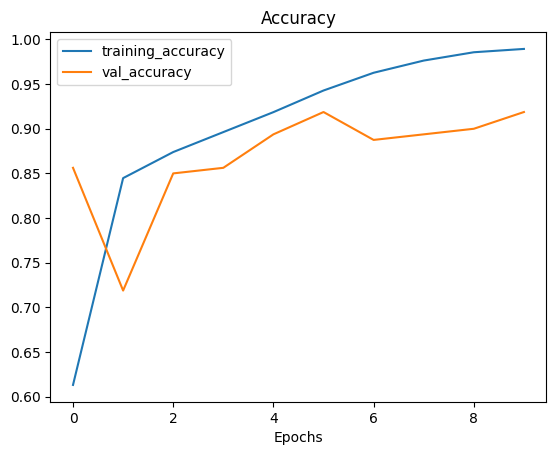

In [ ]:
plot_loss_curves(efficientnet_history)

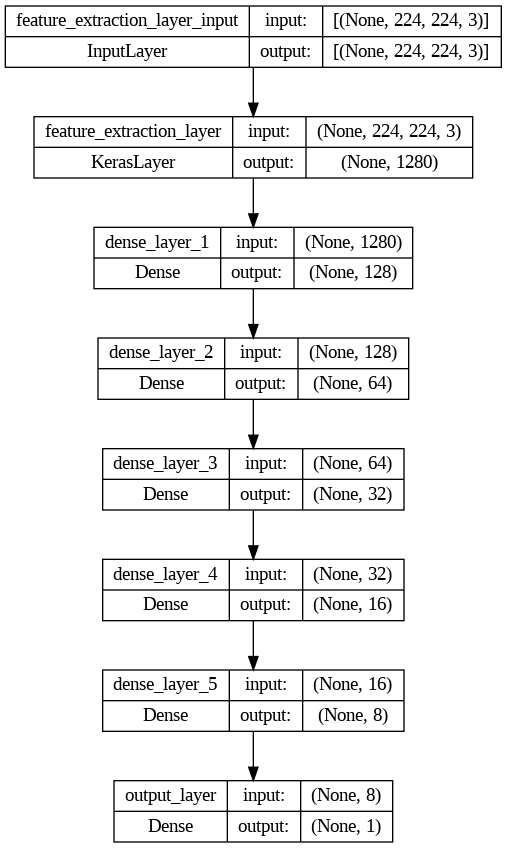

In [ ]:
plot_model(efficientnet_model, show_shapes=True)

### MobileNetV2


In [ ]:
# Create model
mobilenet_model = create_model(mobilenet_url, num_classes=1)

# Compile
mobilenet_model.compile(loss='binary_crossentropy',
                     optimizer=tf.keras.optimizers.Adam(),
                     metrics=['accuracy'])

In [ ]:
# Fit the model
mobilenet_history = mobilenet_model.fit(train_data,
                                  epochs=10,
                                  steps_per_epoch=len(train_data),
                                  validation_data=new_valid_data,
                                  validation_steps=len(new_valid_data),
                                  callbacks=[create_tensorboard_callback(dir_name="tensorflow_hub", # save experiment logs here
                                                                         experiment_name="MobileNet-V2")]) # name of log files

Saving TensorBoard log files to: tensorflow_hub/MobileNet-V2/20240725-123830
Epoch 1/10
51/51 [==============================] - 28s 447ms/step - loss: 0.6705 - accuracy: 0.5925 - val_loss: 0.5471 - val_accuracy: 0.7750
Epoch 2/10
51/51 [==============================] - 21s 415ms/step - loss: 0.5245 - accuracy: 0.7429 - val_loss: 0.3516 - val_accuracy: 0.8313
Epoch 3/10
51/51 [==============================] - 22s 430ms/step - loss: 0.5162 - accuracy: 0.7478 - val_loss: 0.4392 - val_accuracy: 0.7937
Epoch 4/10
51/51 [==============================] - 23s 458ms/step - loss: 0.3614 - accuracy: 0.8540 - val_loss: 0.3601 - val_accuracy: 0.8500
Epoch 5/10
51/51 [==============================] - 20s 397ms/step - loss: 0.3392 - accuracy: 0.8683 - val_loss: 0.5604 - val_accuracy: 0.7000
Epoch 6/10
51/51 [==============================] - 22s 425ms/step - loss: 0.3642 - accuracy: 0.8540 - val_loss: 0.3402 - val_accuracy: 0.8500
Epoch 7/10
51/51 [==============================] - 23s 458ms/ste

In [ ]:
# Mobilenet summary
mobilenet_model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 feature_extraction_layer (  (None, 1280)              410208    
 KerasLayer)                                                     
                                                                 
 dense_layer_1 (Dense)       (None, 128)               163968    
                                                                 
 dense_layer_2 (Dense)       (None, 64)                8256      
                                                                 
 dense_layer_3 (Dense)       (None, 32)                2080      
                                                                 
 dense_layer_4 (Dense)       (None, 16)                528       
                                                                 
 dense_layer_5 (Dense)       (None, 8)                 136       
                                                      

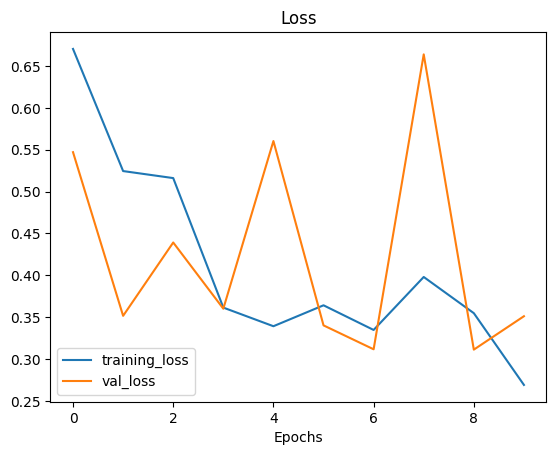

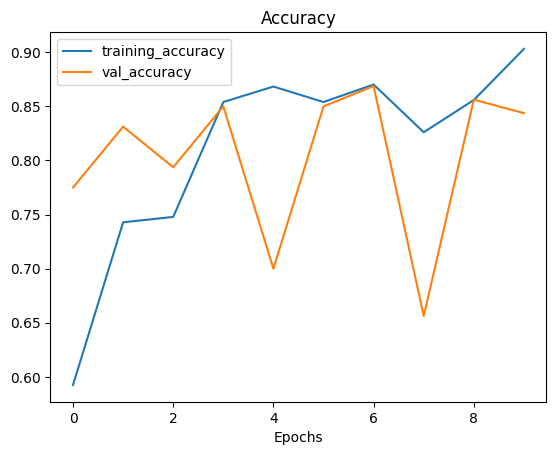

In [ ]:
plot_loss_curves(mobilenet_history)

## Evaluation Metrics

- Create a function that provides all evaluation metrics for a model
- Create a function that provides a confusion matrix table

In [ ]:
new_test_data.labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
      dtype=int32)

In [ ]:
new_valid_data.labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1], dtype=int32)

In [23]:
X_train = new_valid_data
X_test = new_test_data
y_train = new_valid_data.labels
y_test = new_test_data.labels

In [24]:
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score, f1_score
import pandas as pd
import numpy as np

def evaluation_metrics(new_test_data, y_test, **models):
    metrics_summary = {
        'Model': [],
        'Accuracy': [],
        'Precision': [],
        'Recall': [],
        'F1 Score': [],
        'Specificity': [],
        'False Positive Rate (FPR)': [],
        'False Negative Rate (FNR)': [],
        'Positive Predictive Value (PPV)': [],
        'Negative Predictive Value (NPV)': [],
        'Matthews Correlation Coefficient (MCC)': [],
        "Informedness (Youden's J statistic)": [],
        'Markedness': []
    }

    for model_name, model in models.items():
        # Predict
        y_pred = model.predict(new_test_data)
        y_pred_labels = (y_pred > 0.5).astype(int)

        # Calculate metrics
        confusion = confusion_matrix(y_test, y_pred_labels)
        accuracy = accuracy_score(y_test, y_pred_labels)
        recall = recall_score(y_test, y_pred_labels, average='weighted')
        precision = precision_score(y_test, y_pred_labels, average='weighted')
        f1 = f1_score(y_test, y_pred_labels, average='weighted')

        tn, fp, fn, tp = confusion.ravel()
        specificity = tn / (tn + fp)
        fpr = fp / (fp + tn)
        fnr = fn / (fn + tp)
        ppv = tp / (tp + fp)
        npv = tn / (tn + fn)
        mcc = (tp * tn - fp * fn) / np.sqrt((tp + fp) * (tp + fn) * (tn + fp) * (tn + fn))
        informedness = recall + specificity - 1
        markedness = ppv + npv - 1

        # Append to summary
        metrics_summary['Model'].append(model_name)
        metrics_summary['Accuracy'].append(accuracy)
        metrics_summary['Precision'].append(precision)
        metrics_summary['Recall'].append(recall)
        metrics_summary['F1 Score'].append(f1)
        metrics_summary['Specificity'].append(specificity)
        metrics_summary['False Positive Rate (FPR)'].append(fpr)
        metrics_summary['False Negative Rate (FNR)'].append(fnr)
        metrics_summary['Positive Predictive Value (PPV)'].append(ppv)
        metrics_summary['Negative Predictive Value (NPV)'].append(npv)
        metrics_summary['Matthews Correlation Coefficient (MCC)'].append(mcc)
        metrics_summary["Informedness (Youden's J statistic)"].append(informedness)
        metrics_summary['Markedness'].append(markedness)

    # Create summary DataFrame
    df_metrics_summary = pd.DataFrame(metrics_summary)

    # Display the DataFrame
    display(df_metrics_summary)

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix as sk_confusion_matrix

def plot_confusion_matrices(new_test_data, y_test, class_names, **models):
    num_models = len(models)
    fig, axes = plt.subplots(1, num_models, figsize=(6 * num_models, 6))

    if num_models == 1:
        axes = [axes]  # Ensure axes is iterable if there's only one model

    for ax, (model_name, model) in zip(axes, models.items()):
        y_pred = model.predict(new_test_data)
        y_pred_labels = (y_pred > 0.5).astype(int)
        confusion = sk_confusion_matrix(y_test, y_pred_labels)

        sns.heatmap(confusion, annot=True, fmt='d', cbar=True, cmap='Blues', xticklabels=class_names, yticklabels=class_names, ax=ax)
        ax.set_xlabel('Predicted label')
        ax.set_ylabel('True label')
        ax.set_title(f'Confusion Matrix for {model_name}')

    plt.tight_layout()
    plt.show()

## Data Augmentation

- Perform Data Augmentation on training images
- Add Augmented images to original images in the training_data directory (from 1610 smoking/notsmoking images ---> 3220 smoking/notsmoking images)

In [26]:
train_datagen_augmented = ImageDataGenerator(rescale=1/255.,
                                             rotation_range=20, # rotate the image slightly between 0 and 20 degrees (note: this is an int not a float)
                                             shear_range=0.2, # shear the image
                                             zoom_range=0.2, # zoom into the image
                                             width_shift_range=0.2, # shift the image width ways
                                             height_shift_range=0.2, # shift the image height ways
                                             horizontal_flip=True, # flip the image on the horizontal axis
                                             vertical_flip=True) # flip the image on the vertical axis

# Create ImageDataGenerator validation instance with data augmentation
new_val_datagen_augmented = ImageDataGenerator(rescale=1/255.)

# Create ImageDataGenerator test instance without data augmentation
new_test_datagen_augmented = ImageDataGenerator(rescale=1/255.)

In [27]:
train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                                                   target_size=(224, 224),
                                                                   batch_size=32,
                                                                   class_mode='binary',
                                                                   shuffle= False)

new_val_data_augmented = new_val_datagen_augmented.flow_from_directory(new_val_dir,
                                                                   target_size=(224, 224),
                                                                   batch_size=32,
                                                                   class_mode='binary',
                                                                   shuffle= False)

new_test_data_augmented = new_test_datagen_augmented.flow_from_directory(test_dir,
                                                                   target_size=(224, 224),
                                                                   batch_size=32,
                                                                   class_mode='binary',
                                                                   shuffle= False)


Found 1610 images belonging to 2 classes.
Found 160 images belonging to 2 classes.
Found 240 images belonging to 2 classes.



### Add Augmented images into training directory (train_dir)

In [28]:
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator, array_to_img

# Function to save images from DirectoryIterator to target directory using label map
def save_images_from_iterator(iterator, label_map, save_to_dir):
    batch_index = 0
    for batch in iterator:
        images, labels = batch
        for i in range(len(images)):
            img = array_to_img(images[i])
            class_name = label_map[int(labels[i])]
            class_dir = os.path.join(save_to_dir, class_name)
            img.save(os.path.join(class_dir, f'image_{batch_index}_{i}.jpg'))
        batch_index += 1
        if batch_index * iterator.batch_size >= iterator.samples:
            break

In [29]:
# Save images from iterator to directory
save_images_from_iterator(train_data_augmented, label_map, train_dir)

In [30]:
all_train_data = train_datagen.flow_from_directory(train_dir,
                                               batch_size=32, # number of images to process at a time
                                               target_size=(224, 224), # convert all images to be 224 x 224
                                               class_mode="binary", # type of problem we're working on
                                               seed=42,
                                               shuffle=False)

Found 3220 images belonging to 2 classes.


#### Number of Images in the training_data Directory

In [31]:
import os

# To find out how many images are in a specific file
new_num_smoking_images_train = len(os.listdir("Dataset_New/training_data/smoking"))
new_num_nonsmoking_images_train = len(os.listdir("Dataset_New/training_data/smoking"))
print(f"There are {new_num_smoking_images_train} images of smokers in the training Dataset_New.")
print(f"There are {new_num_nonsmoking_images_train} images of non-smokers in the training Dataset_New.")

There are 1610 images of smokers in the training Dataset_New.
There are 1610 images of non-smokers in the training Dataset_New.


## CNN Model (Data Augmented) (Baseline)

Perform a CNN Model by using the new training_data after adding augmented images. This model will be treated as the baseline for our project

In [ ]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Activation, Dropout
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras import Sequential
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

In [ ]:
# Create the model
model_2 = Sequential([
  Conv2D(10, 3, activation='relu', input_shape=(224, 224, 3)),
  MaxPool2D(),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Flatten(),
  Dense(1, activation='sigmoid')
])

# Compile the model
model_2.compile(loss='binary_crossentropy',
                optimizer=Adam(),
                metrics=['accuracy'])

# Callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.0001)

# Fit the model
history_2 = model_2.fit(train_data,
                        epochs=10,
                        steps_per_epoch=len(train_data),
                        validation_data=new_valid_data,
                        validation_steps=len(new_valid_data))

Epoch 1/10
51/51 [==============================] - 24s 391ms/step - loss: 0.7685 - accuracy: 0.5019 - val_loss: 0.7000 - val_accuracy: 0.5000
Epoch 2/10
51/51 [==============================] - 22s 434ms/step - loss: 0.7006 - accuracy: 0.5012 - val_loss: 0.6896 - val_accuracy: 0.5063
Epoch 3/10
51/51 [==============================] - 21s 408ms/step - loss: 0.6903 - accuracy: 0.5615 - val_loss: 0.6890 - val_accuracy: 0.6125
Epoch 4/10
51/51 [==============================] - 22s 434ms/step - loss: 0.6642 - accuracy: 0.6509 - val_loss: 0.6605 - val_accuracy: 0.6687
Epoch 5/10
51/51 [==============================] - 21s 416ms/step - loss: 0.6514 - accuracy: 0.6329 - val_loss: 0.6588 - val_accuracy: 0.6438
Epoch 6/10
51/51 [==============================] - 23s 445ms/step - loss: 0.7540 - accuracy: 0.6988 - val_loss: 0.7156 - val_accuracy: 0.5188
Epoch 7/10
51/51 [==============================] - 21s 416ms/step - loss: 0.6368 - accuracy: 0.6745 - val_loss: 0.6646 - val_accuracy: 0.6313

In [ ]:
# Summary
model_2.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 111, 111, 10)      0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 109, 109, 10)      910       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 54, 54, 10)        0         
 g2D)                                                            
                                                                 
 conv2d_6 (Conv2D)           (None, 52, 52, 10)        910       
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 26, 26, 10)       

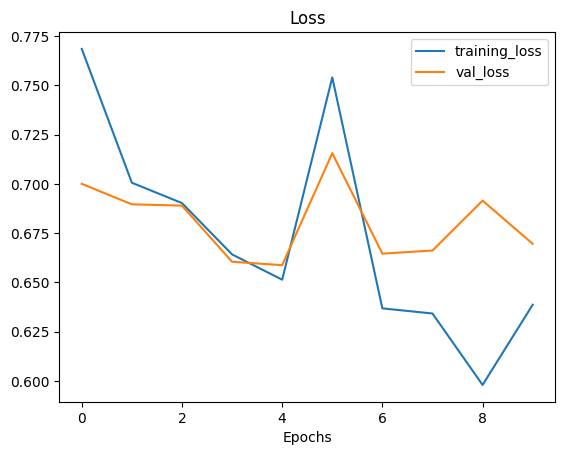

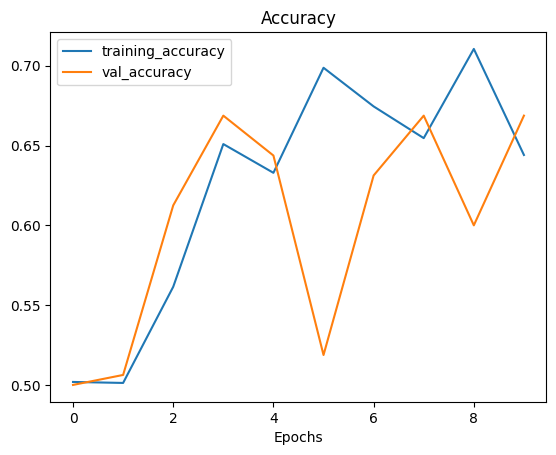

In [ ]:
plot_loss_curves(history_2)

In [ ]:
evaluation_metrics(new_test_data=new_test_data, y_test=y_test,Basic_CNN_Model_After_Augmentation=model_2)

8/8 [==============================] - 3s 377ms/step


,Model,Accuracy,Precision,Recall,F1 Score,Specificity,False Positive Rate (FPR),False Negative Rate (FNR),Positive Predictive Value (PPV),Negative Predictive Value (NPV),Matthews Correlation Coefficient (MCC),Informedness (Youden's J statistic),Markedness
0,Basic_CNN_Model_After_Augmentation,0.633333,0.656301,0.633333,0.61935,0.441667,0.558333,0.175,0.596386,0.716216,0.288722,0.075,0.312602


8/8 [==============================] - 4s 454ms/step


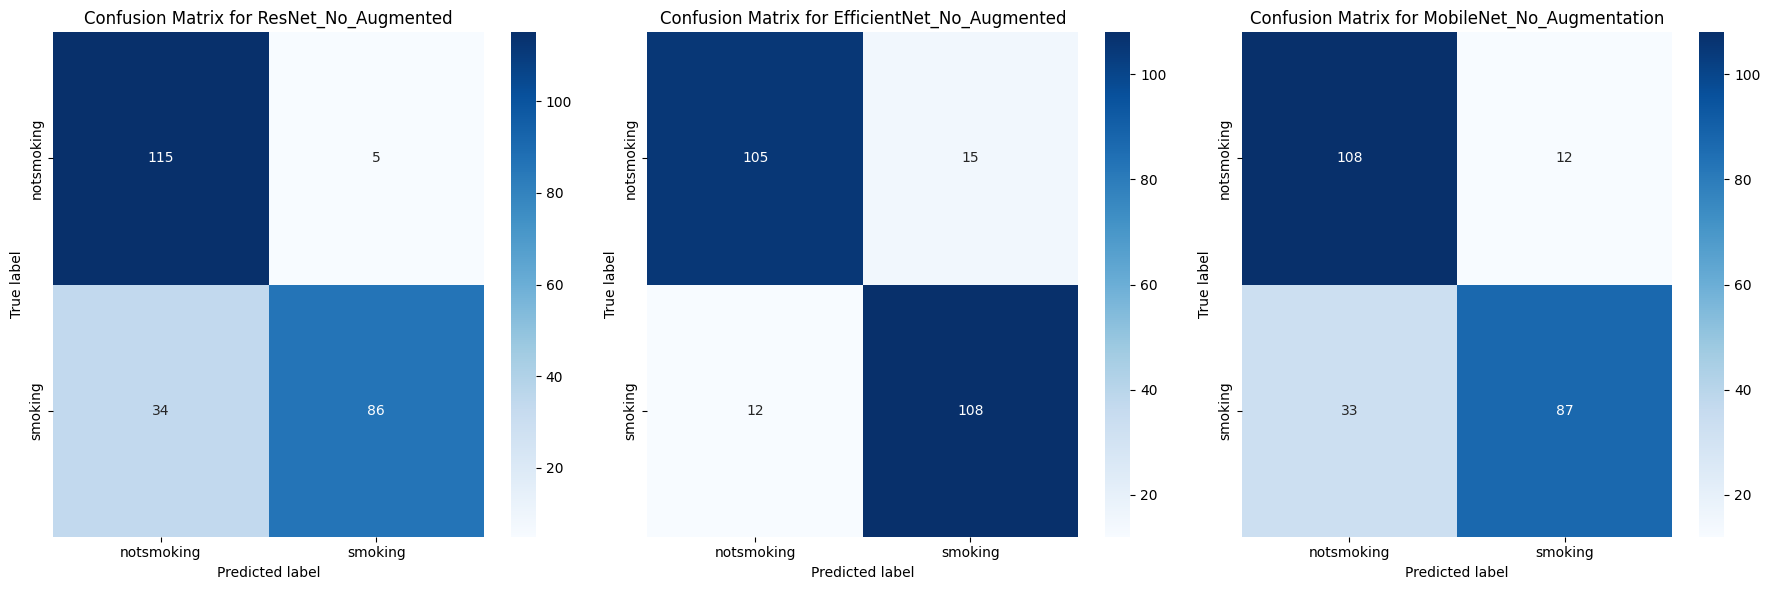

In [ ]:
plot_confusion_matrices(new_test_data=new_test_data, y_test=y_test, class_names=class_names, ResNet_No_Augmented=resnet_model, EfficientNet_No_Augmented=efficientnet_model, MobileNet_No_Augmentation=mobilenet_model)

## Make A Specific Prediction

- Create a function that reads an image from filename, turns it into a tensor
  and reshapes it to (224, 224, 3).
- Create a function that imports an image located at filename, makes a prediction on it with a trained model and plots the image with the predicted class as the title.

### Prediction for a Specific Image

In [ ]:
# Create a function to import an image and resize it to be able to be used with our model
def load_and_prep_image(filename, img_shape=224):
  """
  Reads an image from filename, turns it into a tensor
  and reshapes it to (img_shape, img_shape, color_channel).
  """
  # Read in target file (an image)
  img = tf.io.read_file(filename)

  # Decode the read file into a tensor & ensure 3 colour channels
  # (our model is trained on images with 3 colour channels and sometimes images have 4 color channels)
  img = tf.image.decode_image(img, channels=3)

  # Resize the image (to the same size our model was trained on)
  img = tf.image.resize(img, size = [img_shape, img_shape])

  # Rescale the image (get all values between 0 and 1)
  img = img/255.
  return img

In [ ]:
# Load in and preprocess our custom image
new_test_image = load_and_prep_image("/content/Dataset_New/test/notsmoking/notsmoking_0028.jpg")
new_test_image

In [ ]:
# Add an extra axis
print(f"Shape before new dimension: {new_test_image.shape}")
new_test_image = tf.expand_dims(new_test_image, axis=0) # add an extra dimension at axis 0
#steak = steak[tf.newaxis, ...] # alternative to the above, '...' is short for 'every other dimension'
print(f"Shape after new dimension: {new_test_image.shape}")
new_test_image

In [ ]:
def pred_and_plot(model, filename, class_names):
  """
  Imports an image located at filename, makes a prediction on it with
  a trained model and plots the image with the predicted class as the title.
  """
  # Import the target image and preprocess it
  img = load_and_prep_image(filename)

  # Make a prediction
  pred = model.predict(tf.expand_dims(img, axis=0))

  # Get the predicted class
  pred_class = class_names[int(tf.round(pred)[0][0])]

  # Plot the image and predicted class
  plt.imshow(img)
  plt.title(f"Prediction: {pred_class}")
  plt.axis(False);

1/1 [==============================] - 0s 382ms/step


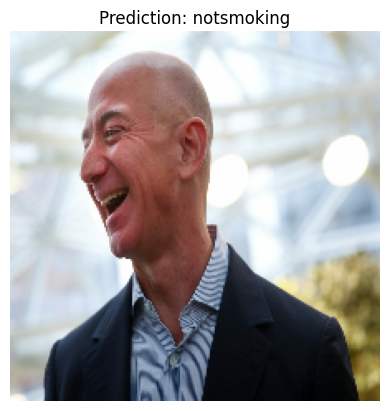

In [ ]:
# Test our model on a custom image
pred_and_plot(model_1, "/content/Dataset_New/test/notsmoking/notsmoking_0028.jpg", class_names)

## Transfer Learning - After Augmentation

- Try 3 different models
1. ResNet50-V2
2. EfficientNetB0-V2
3. MobileNetV2

In [ ]:
# Add timestamp
import datetime
print(f"Notebook last run (end-to-end): {datetime.datetime.now()}")

Notebook last run (end-to-end): 2024-07-25 13:00:15.554303


### ResNetV2-50 Model

In [ ]:
# Create model
resnet_model_augmented = create_model(resnet_url, num_classes=1)

# Compile
resnet_model_augmented.compile(loss='binary_crossentropy',
                     optimizer=tf.keras.optimizers.Adam(),
                     metrics=['accuracy'])

In [ ]:
# Fit the model
resnet_history = resnet_model_augmented.fit(all_train_data,
                                  epochs=10,
                                  steps_per_epoch=len(all_train_data),
                                  validation_data=new_valid_data,
                                  validation_steps=len(new_valid_data),
                                  callbacks=[create_tensorboard_callback(dir_name="tensorflow_hub", # save experiment logs here
                                                                         experiment_name="ResNetV2-50")]) # name of log files

Saving TensorBoard log files to: tensorflow_hub/ResNetV2-50/20240725-145218
Epoch 1/10
101/101 [==============================] - 31s 256ms/step - loss: 0.6955 - accuracy: 0.5916 - val_loss: 0.6244 - val_accuracy: 0.6313
Epoch 2/10
101/101 [==============================] - 26s 256ms/step - loss: 0.5089 - accuracy: 0.7727 - val_loss: 0.3924 - val_accuracy: 0.8125
Epoch 3/10
101/101 [==============================] - 25s 250ms/step - loss: 0.3652 - accuracy: 0.8447 - val_loss: 0.2857 - val_accuracy: 0.8750
Epoch 4/10
101/101 [==============================] - 26s 255ms/step - loss: 0.3155 - accuracy: 0.8630 - val_loss: 0.2787 - val_accuracy: 0.8813
Epoch 5/10
101/101 [==============================] - 26s 248ms/step - loss: 0.2739 - accuracy: 0.8776 - val_loss: 0.2684 - val_accuracy: 0.9187
Epoch 6/10
101/101 [==============================] - 25s 251ms/step - loss: 0.2872 - accuracy: 0.8767 - val_loss: 0.2524 - val_accuracy: 0.9375
Epoch 7/10
101/101 [==============================] - 

In [ ]:
# Resnet summary
resnet_model_augmented.summary()

In [ ]:
plot_loss_curves(resnet_history)

In [ ]:
plot_model(resnet_model_augmented, show_shapes=True)

### EfficientNet-V2 Model


In [ ]:
# Create model
efficientnet_model_augmented = create_model(efficientnet_url, num_classes=1)

# Compile
efficientnet_model_augmented.compile(loss='binary_crossentropy',
                     optimizer=tf.keras.optimizers.Adam(),
                     metrics=['accuracy'])

In [ ]:
# Fit the model
efficientnet_history = efficientnet_model_augmented.fit(all_train_data,
                                  epochs=10,
                                  steps_per_epoch=len(all_train_data),
                                  validation_data=new_valid_data,
                                  validation_steps=len(new_valid_data),
                                  callbacks=[create_tensorboard_callback(dir_name="tensorflow_hub", # save experiment logs here
                                                                         experiment_name="EfficientNet-V2")]) # name of log files

Saving TensorBoard log files to: tensorflow_hub/EfficientNet-V2/20240725-155412
Epoch 1/10
101/101 [==============================] - 36s 265ms/step - loss: 0.5063 - accuracy: 0.7335 - val_loss: 0.6618 - val_accuracy: 0.7188
Epoch 2/10
101/101 [==============================] - 24s 239ms/step - loss: 0.3530 - accuracy: 0.8519 - val_loss: 0.2825 - val_accuracy: 0.8875
Epoch 3/10
101/101 [==============================] - 25s 244ms/step - loss: 0.3014 - accuracy: 0.8711 - val_loss: 0.2843 - val_accuracy: 0.8750
Epoch 4/10
101/101 [==============================] - 23s 226ms/step - loss: 0.2365 - accuracy: 0.9084 - val_loss: 0.2977 - val_accuracy: 0.8875
Epoch 5/10
101/101 [==============================] - 24s 243ms/step - loss: 0.1598 - accuracy: 0.9363 - val_loss: 0.4109 - val_accuracy: 0.8687
Epoch 6/10
101/101 [==============================] - 25s 243ms/step - loss: 0.1480 - accuracy: 0.9407 - val_loss: 0.2641 - val_accuracy: 0.8813
Epoch 7/10
101/101 [==============================

In [ ]:
# EfficientNet summary
efficientnet_model_augmented.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 feature_extraction_layer (  (None, 1280)              5919312   
 KerasLayer)                                                     
                                                                 
 dense_layer_1 (Dense)       (None, 128)               163968    
                                                                 
 dense_layer_2 (Dense)       (None, 64)                8256      
                                                                 
 dense_layer_3 (Dense)       (None, 32)                2080      
                                                                 
 dense_layer_4 (Dense)       (None, 16)                528       
                                                                 
 dense_layer_5 (Dense)       (None, 8)                 136       
                                                     

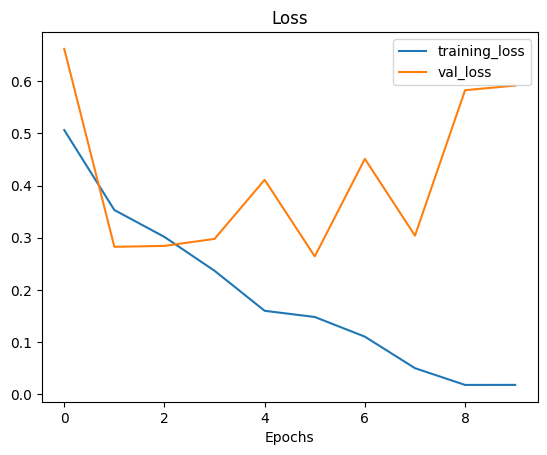

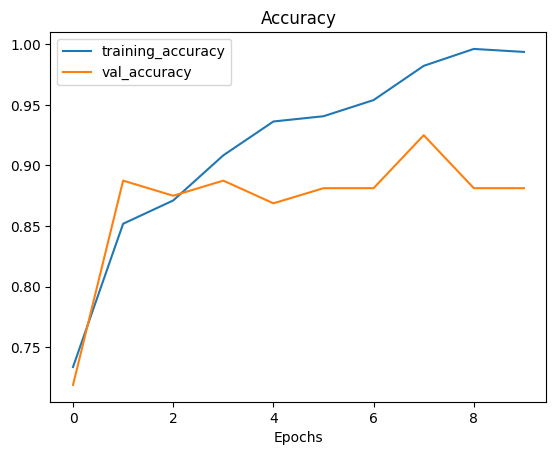

In [ ]:
plot_loss_curves(efficientnet_history)

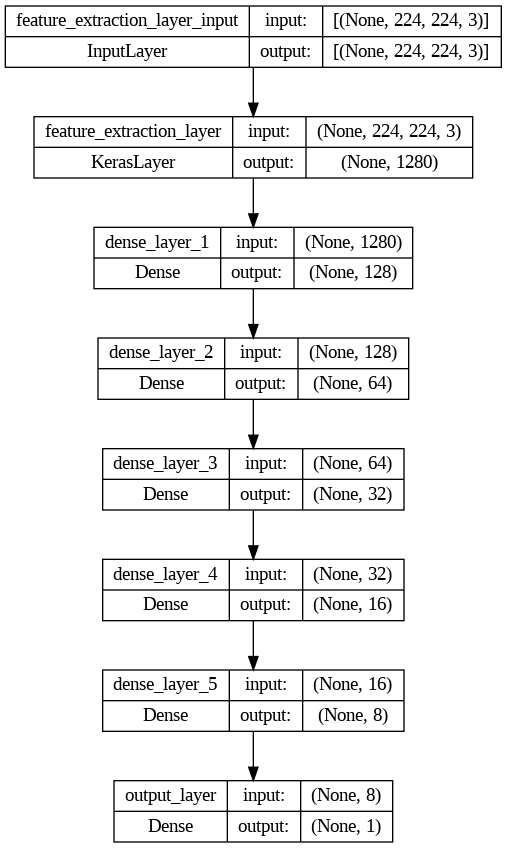

In [ ]:
plot_model(efficientnet_model_augmented, show_shapes=True)

### MobileNetV2


In [ ]:
# Create model
mobilenet_model_augmented = create_model(mobilenet_url, num_classes=1)

# Compile
mobilenet_model_augmented.compile(loss='binary_crossentropy',
                     optimizer=tf.keras.optimizers.Adam(),
                     metrics=['accuracy'])

In [ ]:
# Fit the model
mobilenet_history = mobilenet_model_augmented.fit(all_train_data,
                                  epochs=10,
                                  steps_per_epoch=len(all_train_data),
                                  validation_data=new_valid_data,
                                  validation_steps=len(new_valid_data),
                                  callbacks=[create_tensorboard_callback(dir_name="tensorflow_hub", # save experiment logs here
                                                                         experiment_name="MobileNet-V2")]) # name of log files

Saving TensorBoard log files to: tensorflow_hub/MobileNet-V2/20240725-151659
Epoch 1/10
101/101 [==============================] - 30s 248ms/step - loss: 0.6855 - accuracy: 0.5497 - val_loss: 0.6605 - val_accuracy: 0.5375
Epoch 2/10
101/101 [==============================] - 32s 321ms/step - loss: 0.4498 - accuracy: 0.8012 - val_loss: 0.3476 - val_accuracy: 0.8625
Epoch 3/10
101/101 [==============================] - 27s 274ms/step - loss: 0.4566 - accuracy: 0.8003 - val_loss: 0.5078 - val_accuracy: 0.7812
Epoch 4/10
101/101 [==============================] - 24s 240ms/step - loss: 0.4154 - accuracy: 0.8224 - val_loss: 0.3897 - val_accuracy: 0.8438
Epoch 5/10
101/101 [==============================] - 22s 218ms/step - loss: 0.3780 - accuracy: 0.8425 - val_loss: 0.4266 - val_accuracy: 0.7937
Epoch 6/10
101/101 [==============================] - 25s 248ms/step - loss: 0.3483 - accuracy: 0.8488 - val_loss: 0.3153 - val_accuracy: 0.8562
Epoch 7/10
101/101 [==============================] -

In [ ]:
# Mobilenet summary
mobilenet_model_augmented.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 feature_extraction_layer (  (None, 1280)              410208    
 KerasLayer)                                                     
                                                                 
 dense_layer_1 (Dense)       (None, 128)               163968    
                                                                 
 dense_layer_2 (Dense)       (None, 64)                8256      
                                                                 
 dense_layer_3 (Dense)       (None, 32)                2080      
                                                                 
 dense_layer_4 (Dense)       (None, 16)                528       
                                                                 
 dense_layer_5 (Dense)       (None, 8)                 136       
                                                     

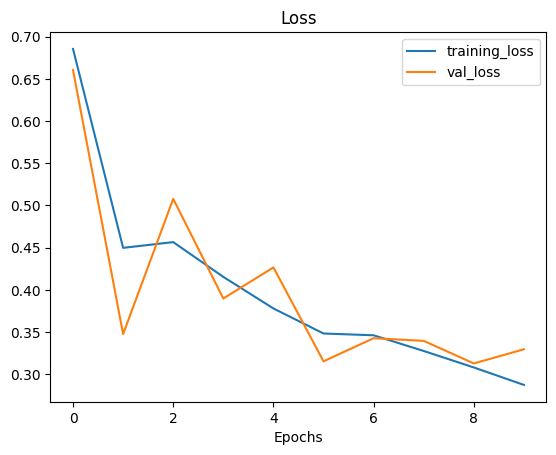

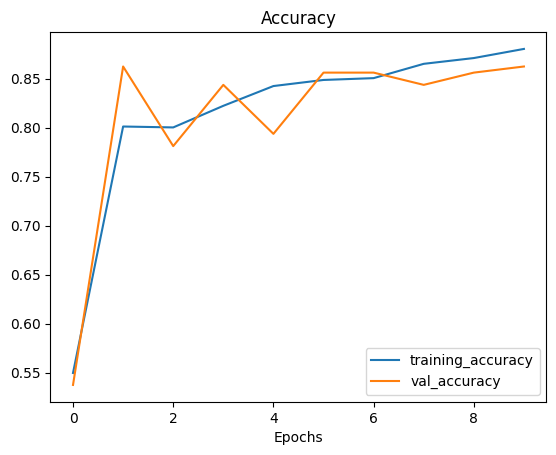

In [ ]:
plot_loss_curves(mobilenet_history)

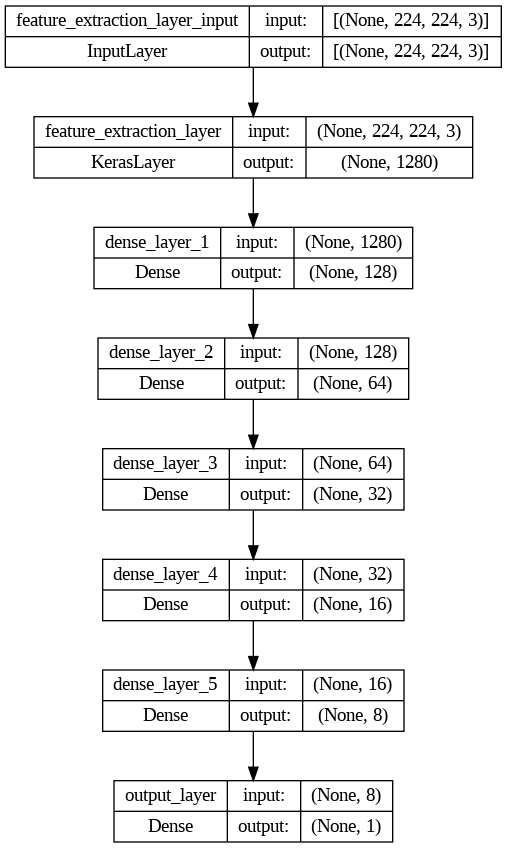

In [ ]:
plot_model(mobilenet_model_augmented, show_shapes=True)

## Comparing Transfer Learning Models (with and without Augmentation)

In [ ]:
evaluation_metrics(new_test_data=new_test_data, y_test=y_test, ResNet_Augmented=resnet_model_augmented, MobileNet_Augmented=mobilenet_model_augmented, EfficientNet_Augmented=efficientnet_model_augmented)


8/8 [==============================] - 4s 494ms/step


,Model,Accuracy,Precision,Recall,F1 Score,Specificity,False Positive Rate (FPR),False Negative Rate (FNR),Positive Predictive Value (PPV),Negative Predictive Value (NPV),Matthews Correlation Coefficient (MCC),Informedness (Youden's J statistic),Markedness
0,ResNet_Augmented,0.895833,0.896081,0.895833,0.895817,0.883333,0.116667,0.091667,0.886179,0.905983,0.791914,0.779167,0.792162
1,EfficientNet_Augmented,0.895833,0.897185,0.895833,0.895745,0.925000,0.075000,0.133333,0.920354,0.874016,0.793017,0.820833,0.794370
2,MobileNet_Augmented,0.858333,0.858433,0.858333,0.858323,0.850000,0.150000,0.133333,0.852459,0.864407,0.716766,0.708333,0.716866


8/8 [==============================] - 3s 353ms/step


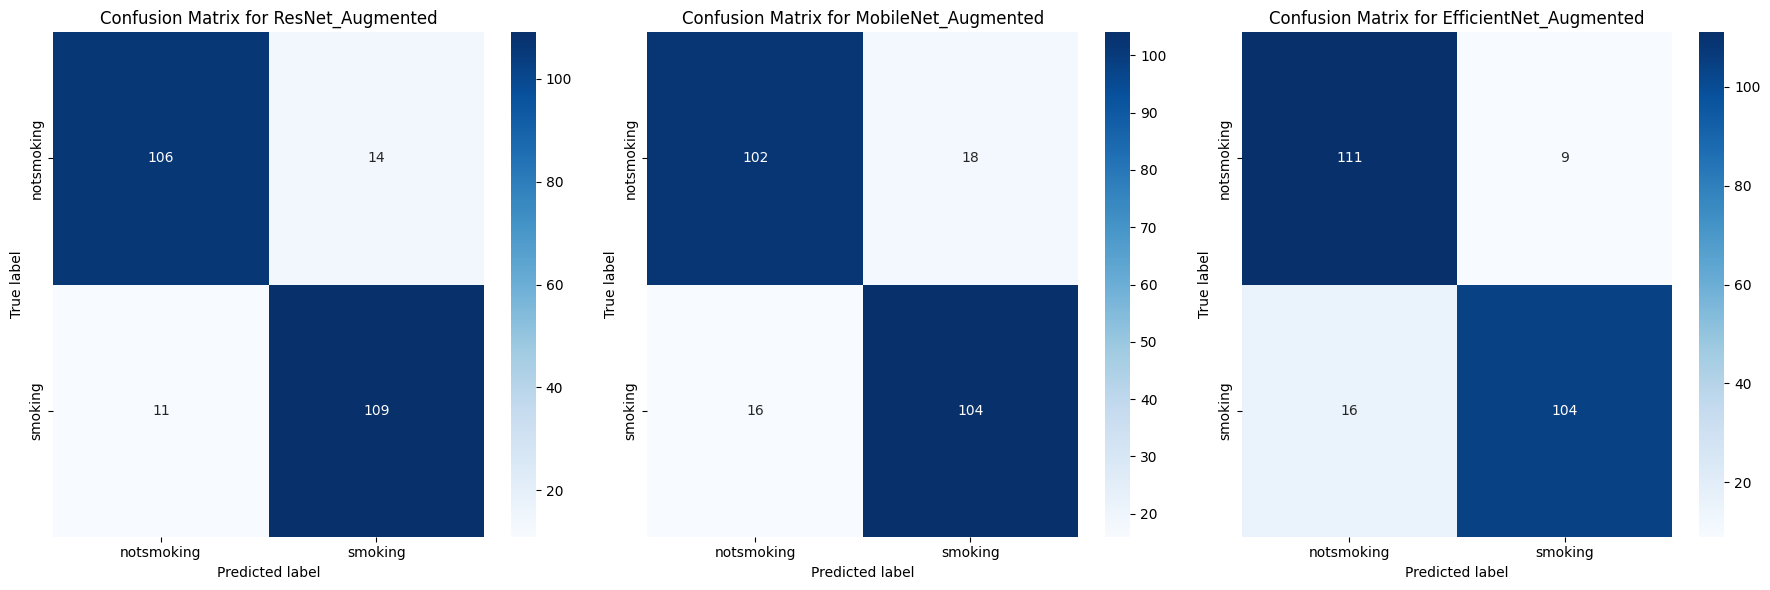

In [ ]:
plot_confusion_matrices(new_test_data=new_test_data, y_test=y_test, class_names=class_names, ResNet_Augmented=resnet_model_augmented, MobileNet_Augmented=mobilenet_model_augmented, EfficientNet_Augmented=efficientnet_model_augmented)

In [ ]:
evaluation_metrics(new_test_data=new_test_data, y_test=y_test, ResNet_No_Augmented=resnet_model, EfficientNet_No_Augmented=efficientnet_model, MobileNet_No_Augmentation=mobilenet_model)

8/8 [==============================] - 3s 346ms/step


,Model,Accuracy,Precision,Recall,F1 Score,Specificity,False Positive Rate (FPR),False Negative Rate (FNR),Positive Predictive Value (PPV),Negative Predictive Value (NPV),Matthews Correlation Coefficient (MCC),Informedness (Youden's J statistic),Markedness
0,ResNet_No_Augmented,0.8375,0.858434,0.8375,0.835092,0.958333,0.041667,0.283333,0.945055,0.771812,0.695619,0.795833,0.716867
1,EfficientNet_No_Augmented,0.8875,0.887742,0.8875,0.887482,0.875000,0.125000,0.100000,0.878049,0.897436,0.775242,0.762500,0.775485
2,MobileNet_No_Augmentation,0.8125,0.822373,0.8125,0.811053,0.900000,0.100000,0.275000,0.878788,0.765957,0.634796,0.712500,0.644745


8/8 [==============================] - 3s 342ms/step


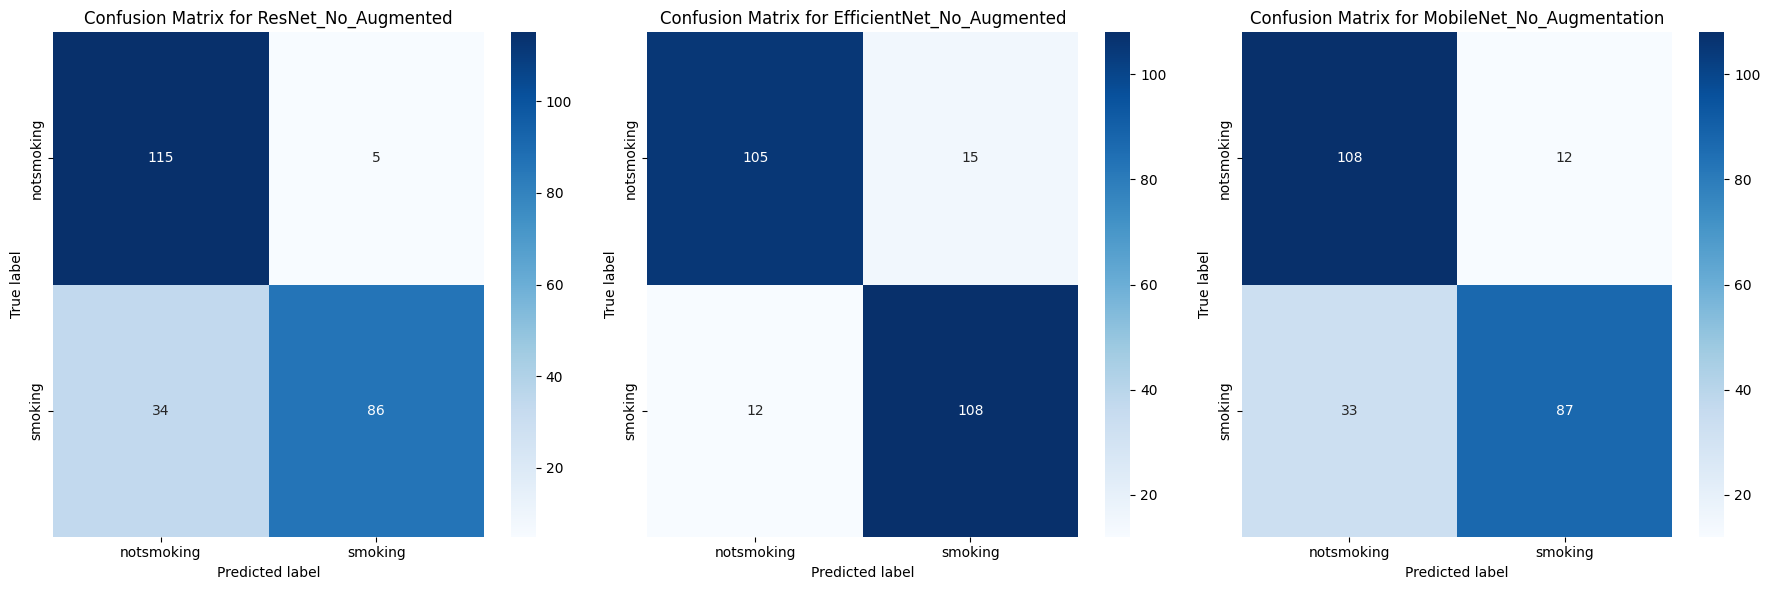

In [ ]:
plot_confusion_matrices(new_test_data=new_test_data, y_test=y_test, class_names=class_names, ResNet_No_Augmented=resnet_model, EfficientNet_No_Augmented=efficientnet_model, MobileNet_No_Augmentation=mobilenet_model)

## Focus on ResNet

### ResNetV2-50 Model (NEW)

In [43]:
# Create model
resnet_model_augmented_new = create_model(resnet_url, num_classes=1)

# Compile
resnet_model_augmented_new.compile(loss='binary_crossentropy',
                     optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
                     metrics=['accuracy'])

In [44]:
# Fit the model
resnet_history = resnet_model_augmented_new.fit(all_train_data,
                                  epochs=16,
                                  steps_per_epoch=len(all_train_data),
                                  validation_data=new_valid_data,
                                  validation_steps=len(new_valid_data),
                                  callbacks=[create_tensorboard_callback(dir_name="tensorflow_hub", # save experiment logs here
                                                                         experiment_name="ResNetV2-50")]) # name of log files

Saving TensorBoard log files to: tensorflow_hub/ResNetV2-50/20240729-191448
Epoch 1/16
101/101 [==============================] - 38s 310ms/step - loss: 0.6661 - accuracy: 0.6003 - val_loss: 0.6251 - val_accuracy: 0.6000
Epoch 2/16
101/101 [==============================] - 24s 239ms/step - loss: 0.5433 - accuracy: 0.7640 - val_loss: 0.4258 - val_accuracy: 0.8750
Epoch 3/16
101/101 [==============================] - 26s 254ms/step - loss: 0.4118 - accuracy: 0.8441 - val_loss: 0.3493 - val_accuracy: 0.8750
Epoch 4/16
101/101 [==============================] - 25s 248ms/step - loss: 0.3758 - accuracy: 0.8481 - val_loss: 0.3005 - val_accuracy: 0.9125
Epoch 5/16
101/101 [==============================] - 25s 247ms/step - loss: 0.3425 - accuracy: 0.8602 - val_loss: 0.3157 - val_accuracy: 0.8750
Epoch 6/16
101/101 [==============================] - 25s 246ms/step - loss: 0.3025 - accuracy: 0.8826 - val_loss: 0.3133 - val_accuracy: 0.8687
Epoch 7/16
101/101 [==============================] - 

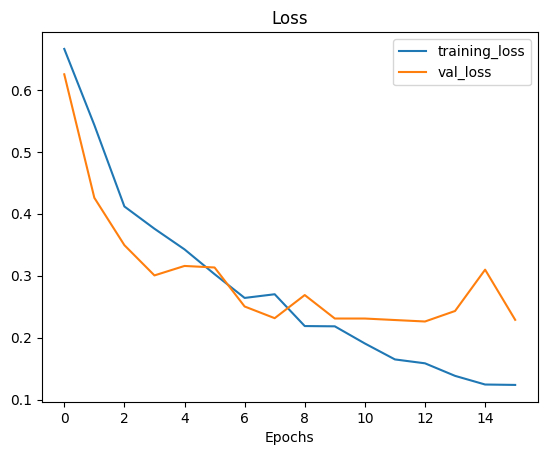

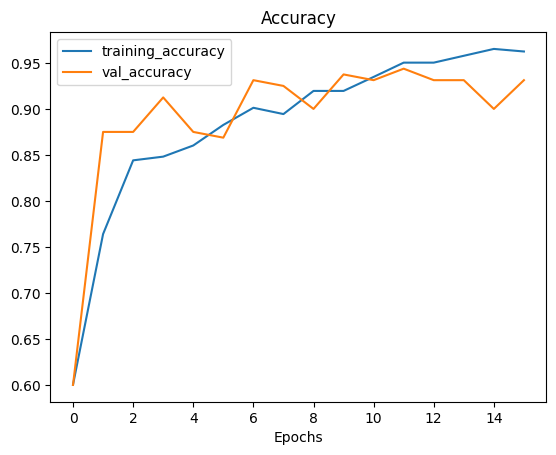

In [45]:
plot_loss_curves(resnet_history)

In [46]:
evaluation_metrics(new_test_data=new_test_data, y_test=y_test, ResNet_Final=resnet_model_augmented_new)

8/8 [==============================] - 3s 362ms/step


,Model,Accuracy,Precision,Recall,F1 Score,Specificity,False Positive Rate (FPR),False Negative Rate (FNR),Positive Predictive Value (PPV),Negative Predictive Value (NPV),Matthews Correlation Coefficient (MCC),Informedness (Youden's J statistic),Markedness
0,ResNet_Final,0.920833,0.921097,0.920833,0.920821,0.908333,0.091667,0.066667,0.910569,0.931624,0.84193,0.829167,0.842193


8/8 [==============================] - 3s 355ms/step


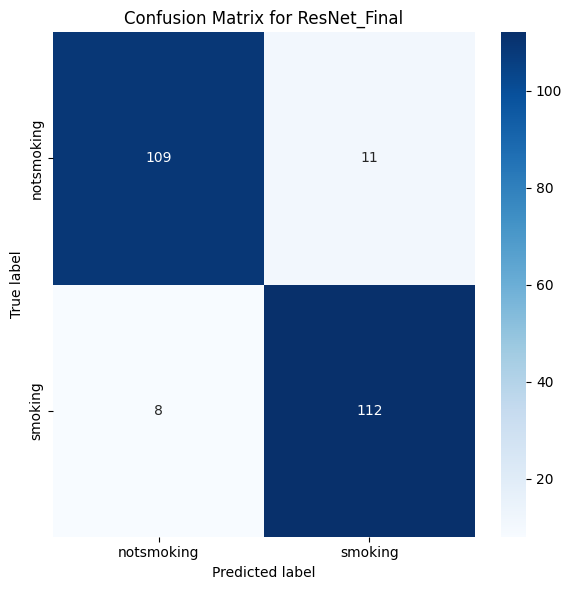

In [47]:
plot_confusion_matrices(new_test_data=new_test_data, y_test=y_test, class_names=class_names, ResNet_Final=resnet_model_augmented_new)

---